# **supervised task weather history regression** #

# **import libraries** #

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 

# **Load data** #

In [33]:
data=pd.read_csv("weatherHistory.csv")
data.head().style.background_gradient()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.000000,1015.130000,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.000000,1015.630000,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.000000,1015.940000,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.000000,1016.410000,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.000000,1016.510000,Partly cloudy throughout the day.


In [34]:
data.tail().style.background_gradient()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.430000,10.996300,31.000000,16.100000,0.000000,1014.360000,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.480000,10.094700,20.000000,15.552600,0.000000,1015.160000,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.560000,8.983800,30.000000,16.100000,0.000000,1015.660000,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.600000,10.529400,20.000000,16.100000,0.000000,1015.950000,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.610000,5.876500,39.000000,15.520400,0.000000,1016.160000,Partly cloudy starting in the morning.


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [36]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [37]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Length: 96453, dtype: bool

In [38]:
data=data.dropna()

# **Data preprocessing** #

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Assuming data is a DataFrame and "Summary" is a column in the DataFrame
oh = OneHotEncoder()
data["Summary"] = oh.fit_transform(data[["Summary"]]).toarray()
data["Daily Summary"]=oh.fit_transform(data[["Daily Summary"]]).toarray()
lb=LabelEncoder()
# apply lb on Precip Type
data["Precip Type"]=lb.fit_transform(data["Precip Type"])

print("the data after encoding =")
data.head().style.background_gradient()

the data after encoding =


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,0.000000,0,9.472222,7.388889,0.890000,14.119700,251.000000,15.826300,0.000000,1015.130000,0.000000
1,2006-04-01 01:00:00.000 +0200,0.000000,0,9.355556,7.227778,0.860000,14.264600,259.000000,15.826300,0.000000,1015.630000,0.000000
2,2006-04-01 02:00:00.000 +0200,0.000000,0,9.377778,9.377778,0.890000,3.928400,204.000000,14.956900,0.000000,1015.940000,0.000000
3,2006-04-01 03:00:00.000 +0200,0.000000,0,8.288889,5.944444,0.830000,14.103600,269.000000,15.826300,0.000000,1016.410000,0.000000
4,2006-04-01 04:00:00.000 +0200,0.000000,0,8.755556,6.977778,0.830000,11.044600,259.000000,15.826300,0.000000,1016.510000,0.000000


In [40]:
data=data.drop(["Formatted Date"],axis=1)

# **Apply regression algorithms** #

In [41]:
#import libraries of algo
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [42]:
# detect the target data
x=data.drop(["Temperature (C)"],axis=1)
y=data["Temperature (C)"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr=LinearRegression()
pl=PolynomialFeatures()
lr.fit(X_train,y_train)

# Polynomial Regression
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_multiple_reg = lr.predict(X_test)
y_pred_poly_reg = poly_reg_model.predict(X_test_poly)

# **Data , measure performance, visulization** #

Multiple Regression:
Mean Squared Error: 0.8994884260139246
R-squared: 0.9901352814701821
Polynomial Regression (Degree 2
Mean Squared Error: 0.2764453888050784
R-squared: 0.9969682145199876


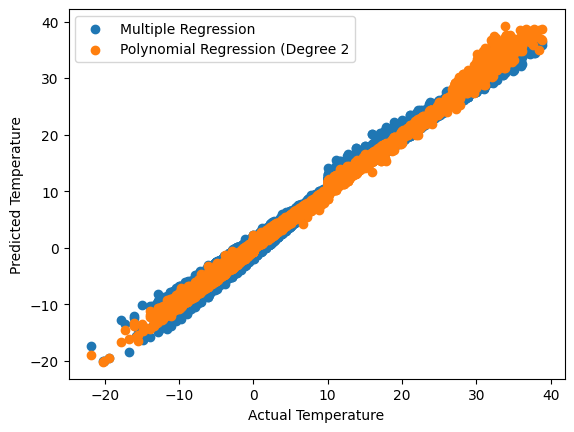

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
# Evaluate the models

print("Multiple Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_multiple_reg))
print("R-squared:", r2_score(y_test, y_pred_multiple_reg))

print(f"Polynomial Regression (Degree {degree}")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly_reg))
print("R-squared:", r2_score(y_test, y_pred_poly_reg))

# Visualize predictions
plt.scatter(y_test, y_pred_multiple_reg, label='Multiple Regression')
plt.scatter(y_test, y_pred_poly_reg, label=f'Polynomial Regression (Degree {degree}')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()